### Importação das bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Visualização dos Dados

In [2]:
df = px.data.gapminder()
df = df.dropna()
df.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### Verifica se há dados duplicados

In [4]:
print("\n--- Verificando linhas duplicadas ---")
tota_duplicados = df.duplicated().sum()
print(f"Total de linhas duplicadas: {tota_duplicados}")


--- Verificando linhas duplicadas ---
Total de linhas duplicadas: 0


### Gráfico Sobre a Evolução da Expectativa de Vida por Continente

In [5]:
df_media_ano_continentes = df.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()
fig = px.line(df_media_ano_continentes, x='year', y='lifeExp', color='continent', title='Evolução da Expectativa de Vida por Continente')
fig.show()

O que o gráfico mostra, de forma bem clara, é que a vida melhorou no mundo inteiro entre 1952 e 2007, com todos os continentes avançando. Enquanto a Oceania e a Europa, que já eram líderes, mantiveram seu crescimento sólido, seguidos de Americas, Ásia e África.

### Gráfico Sobre a Evolução da Expectativa de Vida Mundial

In [6]:
df_media_ano_mundial = df.groupby('year')['lifeExp'].mean().reset_index()
fig = px.line(df_media_ano_mundial, x='year', y='lifeExp', title='Evolução da Expectativa de Vida Mundial')
fig.show()

O gráfico deixa uma mensangem bem clara, que ficou bem melhor de se viver na segunda metade do século XX. No fim das contas, o gráfico indica que com o passar dos anos a expectativa de vida aumentou ao passar dos anos, sem nenhum tipo de queda ou estagnação.

### Gráfico Sobre a Evoluçãp do PIB per capita por Continente

In [7]:
df_evolucao_pib = df.groupby(['year', 'continent'])['gdpPercap'].mean().reset_index()
fig = px.line(df_evolucao_pib, x='year', y='gdpPercap', color='continent', title='Evolução do PIB per capita por Continente')
fig.show()

Analisando o gráfico, o que se percebe é um cenário de grande desigualdade. Enquanto Europa e Oceania cresceram de forma constante e sem problemas, a Ásia, depois de um período de estagnação entre os anos 70 e 80, conseguiu se recuperar de forma impressionante. As Américas, por sua vez, tiveram um aumento de PIB bem mais lento. Já a África, que ficou em último, praticamente não apresentou crescimento, ficando ainda mais para trás.

Gráficos Sobre a População e o PIB per capita em 2007 

In [11]:
df_2007 = df[df['year'] == 2007]
df_2007.loc[df_2007.groupby('continent')['pop'].idxmax()]
fig = px.bar(df_2007, x='continent', y='pop', title='População por Continente em 2007')
fig.show()

fig = px.bar(df_2007, x='continent', y='gdpPercap', title='PIB per capita por Continente em 2007')
fig.show()

Os gráficos de 2007 mostram claramente que não há uma ligação direta entre o tamanho da população e a riqueza de um continente. A Ásia, por exemplo, é um gigante populacional, mas seu PIB per capita médio é superado pela Oceania e pela Europa, que têm muito menos habitantes. Isso prova que o desenvolvimento econômico não depende só do número de pessoas, mas de como a riqueza é distribuída e gerada para cada indivíduo.

### Gráfico Sobre a Relação entre PIB per capita e Expectativa de Vida em 2007

In [12]:
fig = px.scatter(df_2007, x='gdpPercap', y='lifeExp', color='continent', title='Relação entre PIB per capita e Expectativa de Vida em 2007')
fig.show()

O gráfico mostra claramente a correlação entre riqueza e saúde, com a maioria dos países africanos agrupados no canto inferior esquerdo, com baixo PIB e baixa expectativa de vida. O destaque, vai para a Ásia, que se revela um continente de extremos: apesar de ter muitas nações em desenvolvimento, também possui alguns países com um PIB per capita altíssimo, rivalizando com os mais ricos do mundo. Isso quebra a ideia de que um continente é uma coisa só e mostra a incrível diversidade econômica asiática.

### Gráfico Sobre os Países Mais Populosos em 2007

In [14]:
df_pais_mais_populoso_2007 = df_2007.sort_values(by='pop', ascending=False).head(10)
px.bar(df_pais_mais_populoso_2007, x='country', y='pop', title='Países Mais Populosos em 2007')

A lista dos top 10 países mais populosos do mundo em 2007 é completamente dominada pelos gigantes da Ásia (como China, Índia e Indonésia) e das Américas (com Estados Unidos, Brasil e México).

### Criando um Novo DataFrame

In [15]:
df_1952 = df[df['year'] == 1952]
df_1952.loc[df_1952.groupby('continent')['pop'].idxmax()]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1128,Nigeria,Africa,1952,36.324,33119096,1077.281856,NGA,566
1608,United States,Americas,1952,68.440,157553000,13990.482080,USA,840
288,China,Asia,1952,44.000,556263527,400.448611,CHN,156
564,Germany,Europe,1952,67.500,69145952,7144.114393,DEU,276
60,Australia,Oceania,1952,69.120,8691212,10039.595640,AUS,36


Nesse código, primeiro eu crio um DataFrame contendo apenas os dados do ano de 1952. Em seguida, eu agrupo esses dados por continente e uso o ".idxmax()" para encontrar o país que teve a população máxima dentro de cada um desses grupos. 

### Gráfico Sobre a População e o PIB per capita por Continente em 1952

In [17]:
fig = px.bar(df_1952, x='continent', y='pop', title='População por Continente em 1952')
fig.show()

fig = px.bar(df_1952, x='continent', y='gdpPercap', title='PIB per capita por Continente em 1952')
fig.show()

O mundo em 1952 era bem diferente. O que chama a atenção é o contraste gritante: a Ásia, mesmo sendo de longe o continente mais populoso, tinha um PIB per capita muito baixo na época. Por outro lado, a Europa já demonstrava sua força, mostrando que, mesmo com menos gente, a riqueza por pessoa podia ser altíssima. O destaque fica para as Américas e a África, pois ambos tinham populações maiores que a da Oceania, mas um PIB per capita intermediário ou baixo, mostrando que o número de habitantes não era garantia de riqueza.

### Gráfico Sobre a Relação entre PIB per capita e Expectativa de Vida em 1952

In [18]:
fig = px.scatter(df_1952, x='gdpPercap', y='lifeExp', color='continent', title='Relação entre PIB per capita e Expectativa de Vida em 1952')
fig.show()

Fica nítida a situação difícil da África, mostrando a combinação de baixa riqueza e baixa expectativa de vida. Ainda nesse gráfico temos um país asiático específico em uma situação ainda pior que a de muitos africanos. Mas o grande destaque, vai para as Américas, que já em 1952 apareciam em uma posição muito mais confortável, com vários países apresentando um desenvolvimento que rivalizava com o da Europa.

### Gráfico Sobre a Relação entre PIB per capita e Expectativa de Vida

In [ ]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', title='Relação entre PIB per capita e Expectativa de Vida')
fig.show()

Esse gráfico mostra a história completa de 1952 a 2007 e a conclusão é clara: a África ficou consistentemente para trás. O grande destaque, é a Ásia, que mostra sua incrível jornada de desenvolvimento: o continente não só saiu da pobreza, como colocou vários de seus países no mesmo patamar dos mais ricos do mundo, provando a diversidade de realidades que existe por lá.

### Gráfico Sobre a Evolução da Riqueza e Saúde no Mundo (1962-2007)

In [20]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_y=[25,90], title="A Evolução da Riqueza e Saúde no Mundo (1952-2007)")
fig.show()

O grande protagonista da evolução apresentada é, sem dúvida, a Ásia. O gráfico destaca a impressionante trajetória de desenvolvimento de suas nações mais populosas, que avançam da pobreza para maiores níveis de riqueza e expectativa de vida ao longo das décadas. Em paralelo, a Europa consolida sua posição de liderança, mantendo um crescimento constante e coeso a partir de um patamar já elevado.

### Gráfico Sobre Expectativa de Vida por País

In [21]:
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20 ,80], title="Expectativa de Vida por País")
fig.show()

Este mapa ilustra de forma eficaz a tendência global de aumento da expectativa de vida ao longo das décadas. Contudo, ele também destaca uma trágica exceção a esse progresso, evidenciando que, em certos períodos, diversos paíes africanos sofreram uma visível queda em sua longevidade. 

### Criando um segundo DataFrame

In [23]:
df_brasil = df[df['country'] == 'Brazil'].copy()
df_brasil['gdpTotal'] = df_brasil['gdpPercap'] * df_brasil['pop']

Este código primeiro filtra os dados para isolar apenas os dados do Brasil e, em seguida, calcula o PIB Total do país, criando uma nova coluna que é o resultado da multiplicação do PIB per capita pela população.

### Gráfico Sobre a Evolução da Expectativa de Vida no Brasil

In [24]:
fig = px.line(df_brasil, x='year', y='lifeExp', title='Evolução da Expectativa de Vida no Brasil')
fig.show()

O gráfico mostra exatamente que a expectativa de vida no Brasil seguiu uma trajetória de crescimento notável e constante. A linha é consistente, sem apresentar quedas ou períodos de estagnação, refletindo as significativas melhorias em saúde e qualidade de vida que o Brasil experimentou ao longo desses anos.

### Gráfico Sobre a Evolução do PIB per capita no Brasil

In [25]:
fig = px.line(df_brasil, x='year', y='gdpTotal', title='Evolução do PIB per capita no Brasil')
fig.show()

Enquanto o gráfico de expectativa de vida mostra uma linha de progresso social quase ininterrupto, este gráfico do PIB Total revela a outra face da história do Brasil. Os períodos de estagnação e até de queda são a assinatura de uma economia de país emergente, refletindo as crises e instabilidades.

### Gráfico Sobre Correlação entre Variáveis Numéricas

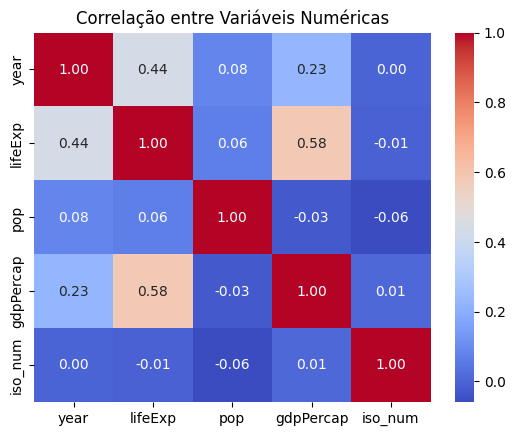

In [26]:
px.box(df_2007, x='continent', y='lifeExp', title='Distribuição da Expectativa de Vida por Continente')

df_corr = df.corr(numeric_only=True)

sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlação entre Variáveis Numéricas')
plt.show()

Esse gráfico é um "mapa de calor" que mostra se as variáveis andam juntas, se são inimigas, ou se uma não tá nem aí pra outra.